In [116]:
import numpy as np
from experiments.hmm.classifier import StateClassifierNet
import torch as th
import torch.nn as nn
from pytorch_lightning import seed_everything
from tint.attr.models import ExtremalMaskNN
from tint.attr.dynamic_masks import DynaMask
from tint.attr.models import MaskNet, Mask
from tint.models import MLP, RNN
from tint.datasets.hmm_modified import HMM_modified
from forward import forward
import matplotlib.pyplot as plt

In [62]:
seed=42
seed_everything(seed=seed, workers=True)

Global seed set to 42


42

In [88]:
# Train classifier and Extremal mask explainer, store model weights
# TODO: add flags for training from scratch and for preservation/deletion game IF DON'T EXIST ALREADY
# %run experiments/hmm/main.py --explainers "extremal_mask" --deterministic --output-file "hmm_modified_results_per_fold.csv" --dataset_name "hmm_modified" --hidden_size 50
### If you use a diff fold u have to change all the file names below
%run experiments/hmm/main.py --fold 0 --explainers "extremal_mask" --deterministic --output-file "hmm_modified_results_per_fold.csv" --dataset_name "hmm_modified" --hidden_size 50 

Global seed set to 42


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name        | Type             | Params
--------------------------------------------------
0  | net         | StateClassifier  | 8.5 K 
1  | _loss       | CrossEntropyLoss | 0     
2  | train_acc   | BinaryAccuracy   | 0     
3  | train_pre   | BinaryPrecision  | 0     
4  | train_rec   | BinaryRecall     | 0     
5  | train_auroc | BinaryAUROC      | 0     
6  | val_acc     | BinaryAccuracy   | 0     
7  | val_pre     | BinaryPrecision  | 0     
8  | val_rec     | BinaryRecall     | 0     
9  | val_auroc   | BinaryAUROC      | 0     
10 | test_acc    | BinaryAccuracy   | 0     
11 | test_pre    | BinaryPrecision  | 0     
12 | test_rec    | BinaryRecall     | 0     
13 | test_auroc  | BinaryAUROC      | 0     
--------------------------------------------------
8.5 K     Trainable params
0         Non-trainable params
8.5 K     Total p

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type           | Params
-----------------------------------------
0 | net   | ExtremalMaskNN | 30.2 K
1 | _loss | MSELoss        | 0     
-----------------------------------------
30.2 K    Trainable params
0         Non-trainable params
30.2 K    Total params
0.121     Total estimated model params size (MB)


preservation mode is  True


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


In [94]:

### dynamask training

%run experiments/hmm/main.py --fold 0 --explainers "dyna_mask" --deterministic --output-file "hmm_modified_dynamask_results_per_fold.csv" --dataset_name "hmm_modified" --hidden_size 50 


Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


classifier has loaded the saved weights on hmm_modified dataset with fold = 0, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type    | Params
----------------------------------
0 | net   | Mask    | 300 K 
1 | _loss | MSELoss | 0     
----------------------------------
300 K     Trainable params
0         Non-trainable params
300 K     Total params
1.200     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.


Predicting: 0it [00:00, ?it/s]

Best keep ratio is 0.30000000000000004


In [95]:
### Get data
train_features = np.load('tint/data/hmm/train_features_modified.npz', allow_pickle= True)   ### DELETE these files b4 running again
test_features = np.load('tint/data/hmm/test_features_modified.npz', allow_pickle= True)
train_labels = np.load('tint/data/hmm/train_labels_modified.npz', allow_pickle= True)

In [96]:
# Transform to tensors, check shape
x_train = th.tensor(train_features)
x_test = th.tensor(test_features)
print(type(x_train),x_train.shape)

<class 'torch.Tensor'> torch.Size([800, 50, 3])


In [97]:
### Get classifier         
# Create model
classifier = StateClassifierNet(
        feature_size=3,
        n_state=2,
        hidden_size=50,
        regres=True,
        loss="cross_entropy",
        lr=0.0001,
        l2=1e-3,
    )

# Load the state dictionary from the checkpoint file
checkpoint_path = 'experiments/checkpoints/hmm_modified_classifier_42_0.ckpt'       ### change path when using different hyperparameters
state_dict = th.load(checkpoint_path)

# Load the state dictionary into the model
classifier.load_state_dict(state_dict)

<All keys matched successfully>

In [99]:
# Sanity check
checkpoint_path = 'experiments/checkpoints/hmm_modified_dyna_mask_42_0.ckpt'           ### change path when using different hyperparameters

# Load the state dictionary
state_dict = th.load(checkpoint_path)

# Print keys and shapes in the state dictionary
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, th.Tensor) else type(value)}")

net.mask: torch.Size([2000, 50, 3])


In [100]:
## using ExtremalMaskNN instead of Net 
EMNN = ExtremalMaskNN(forward_func=classifier,
        model=nn.Sequential(
                RNN(
                    input_size=x_train.shape[-1],        
                    rnn="gru",
                    hidden_size=x_train.shape[-1],
                    bidirectional=True,
                ),
                MLP([2 * x_train.shape[-1], x_train.shape[-1]]),
            ),
        batch_size= 32)

mask = nn.Parameter(th.Tensor([200,50,3]))

# Load the state dictionary from the checkpoint file
checkpoint_path = ''       ### change path when using different hyperparameters
state_dict = th.load(checkpoint_path)

filtered_state_dict_mask =  {key: value for key, value in state_dict.items() if key == 'net.mask'}
filtered_state_dict_model = {key[4:]: value for key, value in state_dict.items() if key !='net.mask'}  # had to get rid of the 'net.' prefix

# Load the state dictionary into the model
#print(EMNN.named_parameters)
for name, param in EMNN.named_parameters():
    print(f"Parameter: {name}, Shape: {param.shape}")

EMNN.load_state_dict(filtered_state_dict_model)
#mask.load_state_dict(filtered_state_dict_mask)
mask = state_dict['net.mask']

Parameter: model.0.rnn.weight_ih_l0, Shape: torch.Size([9, 3])
Parameter: model.0.rnn.weight_hh_l0, Shape: torch.Size([9, 3])
Parameter: model.0.rnn.bias_ih_l0, Shape: torch.Size([9])
Parameter: model.0.rnn.bias_hh_l0, Shape: torch.Size([9])
Parameter: model.0.rnn.weight_ih_l0_reverse, Shape: torch.Size([9, 3])
Parameter: model.0.rnn.weight_hh_l0_reverse, Shape: torch.Size([9, 3])
Parameter: model.0.rnn.bias_ih_l0_reverse, Shape: torch.Size([9])
Parameter: model.0.rnn.bias_hh_l0_reverse, Shape: torch.Size([9])
Parameter: model.1.mlp.Linear_0.weight, Shape: torch.Size([3, 6])
Parameter: model.1.mlp.Linear_0.bias, Shape: torch.Size([3])


RuntimeError: Error(s) in loading state_dict for ExtremalMaskNN:
	Missing key(s) in state_dict: "model.0.rnn.weight_ih_l0", "model.0.rnn.weight_hh_l0", "model.0.rnn.bias_ih_l0", "model.0.rnn.bias_hh_l0", "model.0.rnn.weight_ih_l0_reverse", "model.0.rnn.weight_hh_l0_reverse", "model.0.rnn.bias_ih_l0_reverse", "model.0.rnn.bias_hh_l0_reverse", "model.1.mlp.Linear_0.weight", "model.1.mlp.Linear_0.bias". 

In [106]:
# Sanity check
checkpoint_path = 'experiments/checkpoints/hmm_modified_dyna_mask_42_0.ckpt'           ### change path when using different hyperparameters

# Load the state dictionary
state_dict = th.load(checkpoint_path)

# Print keys and shapes in the state dictionary
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, th.Tensor) else type(value)}")

net.mask: torch.Size([2000, 50, 3])


In [122]:
### make code like above, but for dynamask

## using ExtremalMaskNN instead of Net 
DynaMask_mask = Mask(
            forward_func=classifier,
            perturbation="gaussian_blur",
            sigma_max=1,
            keep_ratio=list(np.arange(0.25, 0.35, 0.01)),
            size_reg_factor_init=0.1,
            size_reg_factor_dilation=100,
            time_reg_factor=1.0,
        )
DynaMask_explainer = DynaMask('hmm_modified', classifier, 42, 0)

# Load the state dictionary from the checkpoint file
checkpoint_path = 'experiments/checkpoints/hmm_modified_dyna_mask_42_0.ckpt'       ### change path when using different hyperparameters
state_dict = th.load(checkpoint_path)
DynaMask_mask.mask = state_dict["net.mask"]
print(DynaMask_mask.mask)
for name, param in DynaMask_mask.named_parameters():
    print(f"Parameter name: {name}, Size: {param.size()}")
filtered_state_dict = {key[4:]: value for key, value in state_dict.items()}  # had to get rid of the 'net.' prefix

DynaMask_mask.load_state_dict(state_dict)

TypeError: cannot assign 'torch.FloatTensor' as parameter 'mask' (torch.nn.Parameter or None expected)

(array([21095.,   217.,   231.,   260.,   291.,   371.,   470.,   666.,
         1055.,  5344.]),
 array([-0.00897944,  0.09297914,  0.19493772,  0.29689631,  0.39885491,
         0.50081348,  0.60277206,  0.70473063,  0.80668926,  0.90864784,
         1.01060641]),
 <BarContainer object of 10 artists>)

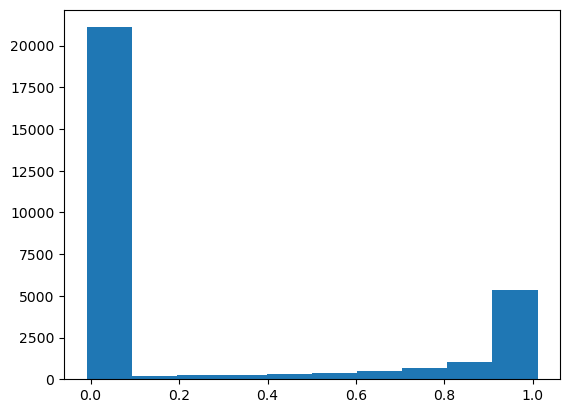

In [81]:
plt.hist(mask.view(-1))

In [82]:
def perturb(x,m,x_):
    return m*x + (1-m)*x_ 

In [83]:
hmm = HMM_modified(n_folds=5, fold=1, seed=seed)      ### set the right fold

In [84]:
# Apply forward algorithm to get log probabilities of test set datapoints and their perturbations

N = x_test.shape[0]
p = np.zeros(shape=(N,2))
l = np.zeros(shape=(N,2))
for i in range(N):    
    x = x_test[i].to(th.float32)
    #print(type(x))
    x_ = EMNN.model(x)  ### baselines are 0 by default
    x_p = perturb(x,mask[i],x_) 
    x = x.detach().numpy()
    x_p = x_p.detach().numpy()
    p[i,0] = forward(hmm, x)[1]
    p[i,1] = forward(hmm, x_p)[1]
    l[i,0] = np.log(p[i,0])
    l[i,1] = np.log(p[i,1])
    
print(f"probs: {np.mean(p, axis=0)}")
print(f"mean log probs: {np.mean(l, axis=0)}")

probs: [2.08896713e-79 9.27594260e-72]
mean log probs: [-211.23392499 -174.39077039]


Text(0.5, 1.0, 'Log probability boxplot')

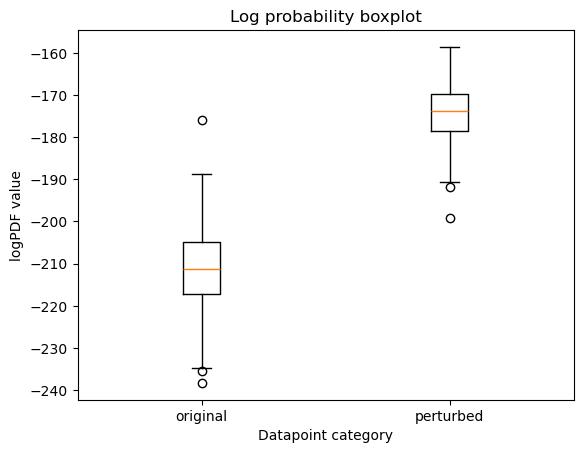

In [85]:
plt.boxplot(l, labels=['original','perturbed'])
# Add labels and title
plt.xlabel('Datapoint category')
plt.ylabel('logPDF value')
plt.title('Log probability boxplot')